# Neural Network Regression with Different Loss Functions

이번 실습에서는 TensorFlow를 활용하여 Neural Network 회귀 모델을 만들고, 
다양한 손실 함수 (MSE, MAE, Huber Loss)를 적용하여 비교해봅니다.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 불러오기 및 전처리

In [11]:
# 데이터 구조 확인 (스케일링 후)
print("=" * 50)
print("데이터 구조 확인 (스케일링 후)")
print("=" * 50)
print(f"\n[원본 데이터 정보]")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\n[특성 이름]")
print(housing.feature_names)
print(f"\n[학습/테스트 분할 후]")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"\n[스케일링 후 데이터 통계]")
print(f"X_train - 최소값: {X_train.min():.2f}, 최대값: {X_train.max():.2f}")
print(f"X_train - 평균: {X_train.mean():.2f}, 표준편차: {X_train.std():.2f}")
print(f"X_test - 최소값: {X_test.min():.2f}, 최대값: {X_test.max():.2f}")
print(f"\n[타겟 변수 통계]")
print(f"y_train - 최소값: {y_train.min():.2f}, 최대값: {y_train.max():.2f}")
print(f"y_train - 평균: {y_train.mean():.2f}, 표준편차: {y_train.std():.2f}")
print(f"y_test - 최소값: {y_test.min():.2f}, 최대값: {y_test.max():.2f}")
print("=" * 50)


데이터 구조 확인 (스케일링 후)

[원본 데이터 정보]
X shape: (20640, 8)
y shape: (20640,)

[특성 이름]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

[학습/테스트 분할 후]
X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)

[스케일링 후 데이터 통계]
X_train - 최소값: -2.38, 최대값: 107.12
X_train - 평균: -0.00, 표준편차: 1.00
X_test - 최소값: -2.30, 최대값: 76.11

[타겟 변수 통계]
y_train - 최소값: 0.15, 최대값: 5.00
y_train - 평균: 2.07, 표준편차: 1.16
y_test - 최소값: 0.15, 최대값: 5.00


In [10]:
# 1. 데이터 불러오기
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. train / test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. 모델 정의 함수

In [12]:
def build_model(loss_fn):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1)   # 회귀 출력
    ])
    model.compile(optimizer="adam", loss=loss_fn, metrics=["mae"])
    return model

## 3. 손실 함수별 학습 (MSE, MAE, Huber Loss)

In [13]:
loss_functions = {
    "MSE": "mse",
    "MAE": "mae",
    "Huber": tf.keras.losses.Huber()
}

histories = {}

for name, loss_fn in loss_functions.items():
    print(f"\n=== Training with {name} Loss ===")
    model = build_model(loss_fn)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20,
        batch_size=32,
        verbose=2
    )
    histories[name] = history


=== Training with MSE Loss ===
Epoch 1/20
516/516 - 0s - loss: 0.9451 - mae: 0.6434 - val_loss: 0.4461 - val_mae: 0.4813 - 352ms/epoch - 681us/step
Epoch 2/20
516/516 - 0s - loss: 0.3984 - mae: 0.4511 - val_loss: 0.3973 - val_mae: 0.4631 - 226ms/epoch - 438us/step
Epoch 3/20
516/516 - 0s - loss: 0.3794 - mae: 0.4342 - val_loss: 0.3873 - val_mae: 0.4325 - 218ms/epoch - 422us/step
Epoch 4/20
516/516 - 0s - loss: 0.3605 - mae: 0.4229 - val_loss: 0.3536 - val_mae: 0.4158 - 260ms/epoch - 504us/step
Epoch 5/20
516/516 - 0s - loss: 0.3427 - mae: 0.4132 - val_loss: 0.3428 - val_mae: 0.4140 - 222ms/epoch - 430us/step
Epoch 6/20
516/516 - 0s - loss: 0.3451 - mae: 0.4079 - val_loss: 0.3541 - val_mae: 0.4072 - 214ms/epoch - 415us/step
Epoch 7/20
516/516 - 0s - loss: 0.3426 - mae: 0.4005 - val_loss: 0.3275 - val_mae: 0.3952 - 212ms/epoch - 411us/step
Epoch 8/20
516/516 - 0s - loss: 0.3247 - mae: 0.3965 - val_loss: 0.3251 - val_mae: 0.3949 - 216ms/epoch - 419us/step
Epoch 9/20
516/516 - 0s - loss: 

## 4. 학습 결과 시각화

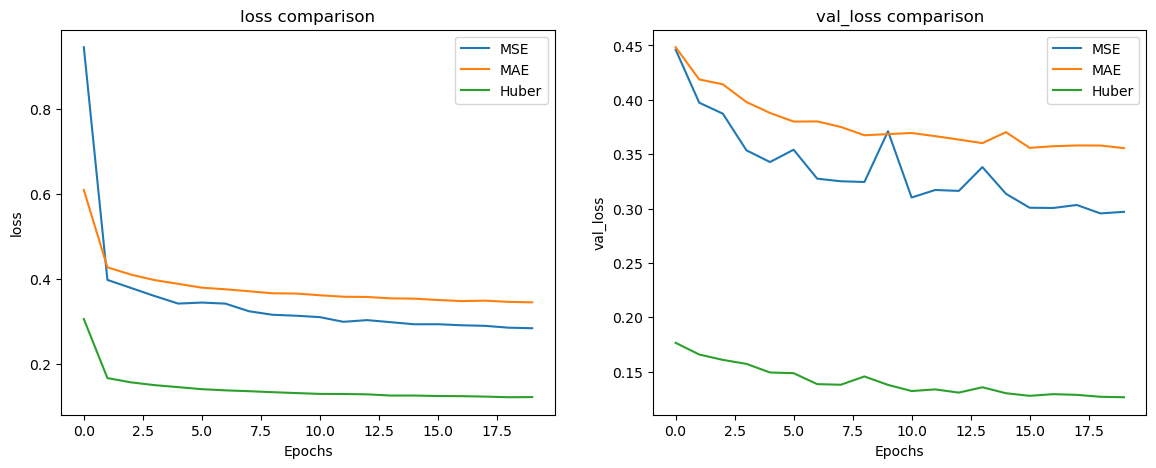

In [14]:
plt.figure(figsize=(14,5))

for i, metric in enumerate(["loss", "val_loss"]):
    plt.subplot(1, 2, i+1)
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f"{name}")
    plt.title(f"{metric} comparison")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()

plt.show()

## 5. 그래프 결과 해석

### Loss Comparison (훈련 손실 비교)

**의미:**
- 모델이 **학습 데이터에 얼마나 잘 맞는지**를 보여줍니다
- 학습 과정에서 모델이 훈련 데이터를 얼마나 잘 학습하고 있는지 나타냅니다

**해석 방법:**
- **낮을수록 좋음**: 손실 값이 낮을수록 모델이 훈련 데이터에 잘 맞습니다
- **감소 추세**: 에포크가 진행될수록 손실이 감소하면 학습이 잘 되고 있다는 의미입니다
- **과적합 주의**: 훈련 손실만 낮고 검증 손실이 높다면 과적합 가능성이 있습니다

---

### Val Loss Comparison (검증 손실 비교)

**의미:**
- 모델이 **보지 못한 새로운 데이터에 얼마나 잘 일반화되는지**를 보여줍니다
- 모델의 일반화 성능을 평가하는 중요한 지표입니다

**해석 방법:**
- **낮을수록 좋음**: 손실 값이 낮을수록 새로운 데이터에 대한 예측 성능이 좋습니다
- **증가 추세 주의**: 검증 손실이 증가하면 과적합 가능성이 있습니다
- **훈련 손실과 비교**: 훈련 손실과 검증 손실의 차이가 크면 과적합을 의심해봐야 합니다

---

### 손실 함수별 특징

1. **MSE (Mean Squared Error)**
   - 큰 오차에 더 민감하게 반응합니다
   - 이상치(outlier)에 강하게 영향을 받습니다
   - 그래프에서 보면 초기 손실이 높고, 학습이 진행되면서 감소합니다

2. **MAE (Mean Absolute Error)**
   - 모든 오차를 동등하게 처리합니다
   - 이상치에 덜 민감합니다
   - 그래프에서 보면 MSE보다 높은 손실 값을 유지하는 경향이 있습니다

3. **Huber Loss**
   - 작은 오차는 MAE처럼, 큰 오차는 MSE처럼 처리합니다
   - 이상치에 강건하면서도 학습이 안정적입니다
   - 그래프에서 보면 세 가지 손실 함수 중 가장 낮은 손실 값을 보여줍니다

---

### 결과 분석

이 그래프를 통해 알 수 있는 것:

1. **모델 학습 상태**: 모든 손실 함수에서 에포크가 진행될수록 손실이 감소하므로 모델이 학습되고 있음을 확인할 수 있습니다

2. **최적 손실 함수**: 이 데이터셋에서는 Huber Loss가 훈련 및 검증 모두에서 가장 낮은 손실을 보여주므로, 이 데이터셋에 가장 적합한 손실 함수입니다

3. **일반화 성능**: 검증 손실이 훈련 손실과 비슷한 수준을 유지하면 모델이 잘 일반화되고 있다는 의미입니다

4. **과적합 여부**: 검증 손실이 훈련 손실보다 훨씬 높거나 증가 추세라면 과적합을 의심해봐야 합니다
